# 6.3 Geographical Visualizations with Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json
import plotly
import plotly.express as px

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
path=r'C:\Users\banda\Chocolate'

In [4]:
df=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_clean1.csv'))

In [5]:
df.head()

,Unnamed: 0,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag
0,0,A. Morin,Agua Grande,1876,00:00.0,0.63,France,3.75,,Sao Tome,High rating
1,1,A. Morin,Kpime,1676,00:00.0,0.70,France,2.75,,Togo,Mid rating
2,2,A. Morin,Atsane,1676,00:00.0,0.70,France,3.00,,Togo,Mid rating
3,3,A. Morin,Akata,1680,00:00.0,0.70,France,3.50,,Togo,High rating
4,4,A. Morin,Quilla,1704,00:00.0,0.70,France,3.50,,Peru,High rating


In [6]:
##Drop unnamed columns in df
df = df.drop(columns = ['Unnamed: 0'])

Importing .json file 

In [7]:
country_geo=r'C:\Users\banda\Chocolate\02 Data\Original Data\world-countries.json'

In [8]:
country_geo

'C:\\Users\\banda\\Chocolate\\02 Data\\Original Data\\world-countries.json'

Data to plot

In [9]:
#looking at unquie country where chocolate companies are located around the world 
unique_countries = df['Company_Location'].unique()
print(unique_countries)

['France' 'U.S.A.' 'Fiji' 'Ecuador' 'Mexico' 'Switzerland' 'Netherlands'
 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'U.K.' 'Australia' 'Wales'
 'Belgium' 'Germany' 'Russia' 'Puerto Rico' 'Venezuela' 'Colombia' 'Japan'
 'New Zealand' 'Costa Rica' 'South Korea' 'Amsterdam' 'Scotland'
 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala' 'South Africa' 'Bolivia'
 'St. Lucia' 'Portugal' 'Singapore' 'Denmark' 'Vietnam' 'Grenada' 'Israel'
 'India' 'Czech Republic' 'Domincan Republic' 'Finland' 'Madagascar'
 'Philippines' 'Sweden' 'Poland' 'Austria' 'Honduras' 'Nicaragua'
 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland' 'Eucador' 'Hungary'
 'Suriname' 'Ireland']


In [10]:
# changing Name U.S.A. to United States of America to match with Json file format.
df['Company_Location'].replace({'U.S.A.': 'United States of America'}, inplace=True)

In [11]:
#looking at unquie country where chocolate companies are located around the world 
unique_countries = df['Company_Location'].unique()
print(unique_countries)

['France' 'United States of America' 'Fiji' 'Ecuador' 'Mexico'
 'Switzerland' 'Netherlands' 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil'
 'U.K.' 'Australia' 'Wales' 'Belgium' 'Germany' 'Russia' 'Puerto Rico'
 'Venezuela' 'Colombia' 'Japan' 'New Zealand' 'Costa Rica' 'South Korea'
 'Amsterdam' 'Scotland' 'Martinique' 'Sao Tome' 'Argentina' 'Guatemala'
 'South Africa' 'Bolivia' 'St. Lucia' 'Portugal' 'Singapore' 'Denmark'
 'Vietnam' 'Grenada' 'Israel' 'India' 'Czech Republic' 'Domincan Republic'
 'Finland' 'Madagascar' 'Philippines' 'Sweden' 'Poland' 'Austria'
 'Honduras' 'Nicaragua' 'Lithuania' 'Niacragua' 'Chile' 'Ghana' 'Iceland'
 'Eucador' 'Hungary' 'Suriname' 'Ireland']


In [12]:
#create data just with countries and rating. 
data_to_plot=df[['Company_Location','Rating']]
data_to_plot.head()

,Company_Location,Rating
0,France,3.75
1,France,2.75
2,France,3.00
3,France,3.50
4,France,3.50


In [13]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -95], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Company_Location','Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rating").add_to(map)

folium.LayerControl().add_to(map)

map

In [14]:
map.save('plot_data.html')

Discuss the results and what they mean in a markdown section.
since there are 60 countries- most of the asian and african area are blacked out since there were no values in those. Canadian and australia has darker color and few european country 
Does the analysis answer any of your existing research questions?
yes it Chili, Amsterdam, Netherlands, Philippines. are highest in average rating. 



C:\Users\banda\AppData\Local\Temp\ipykernel_32184\1180305170.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_chart = sns.barplot(x='Company_Location', y='Rating', data=df, order=avg_rating_by_location.index, ci=None, palette='viridis')


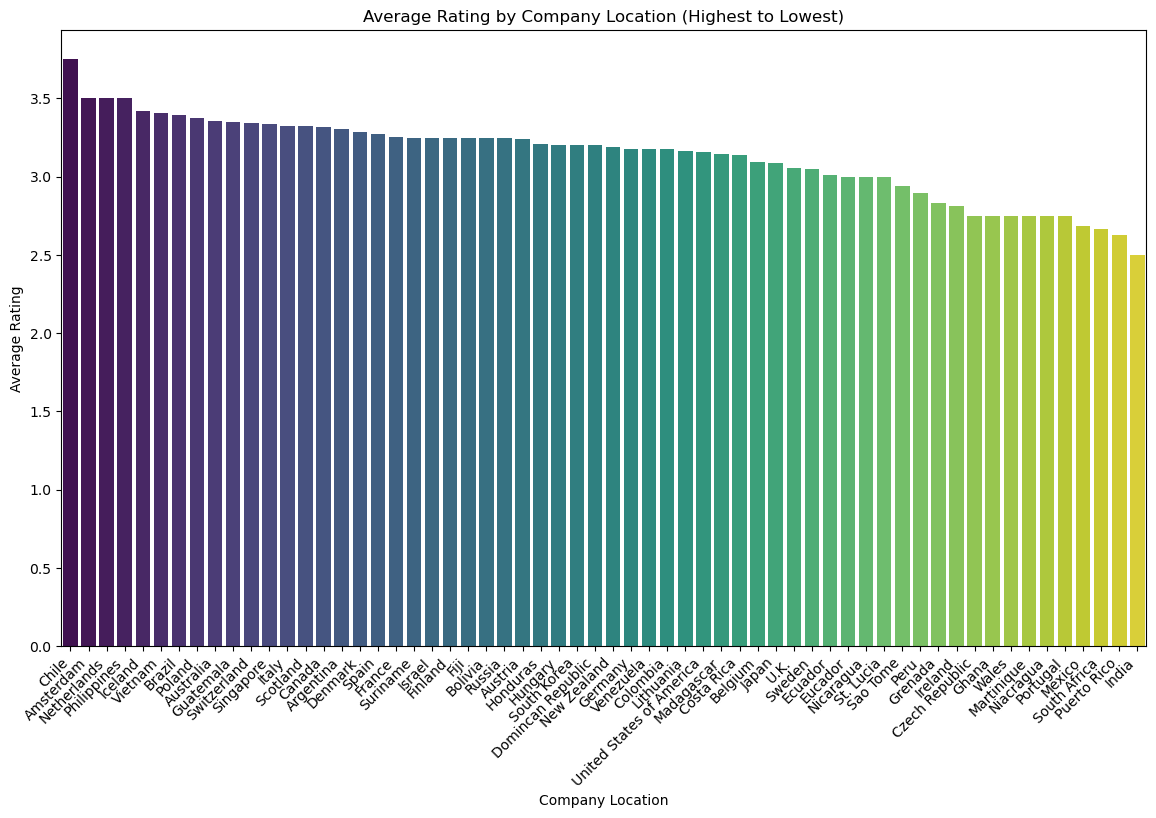

In [15]:


# Calculate the average rating for each country and sort in descending order
avg_rating_by_location = df.groupby('Company_Location')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

# Create a bar chart with explicit order and ci=None
bar_chart = sns.barplot(x='Company_Location', y='Rating', data=df, order=avg_rating_by_location.index, ci=None, palette='viridis')

# Customize plot labels and title
plt.title('Average Rating by Company Location (Highest to Lowest)')
plt.xlabel('Company Location')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better visibility
bar_chart.set_xticklabels(bar_chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()

In [16]:
path=r'C:\Users\banda\Chocolate'

In [17]:
bar_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barforcountryrating.png'))

In [18]:
df.head()

,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag
0,A. Morin,Agua Grande,1876,00:00.0,0.63,France,3.75,,Sao Tome,High rating
1,A. Morin,Kpime,1676,00:00.0,0.70,France,2.75,,Togo,Mid rating
2,A. Morin,Atsane,1676,00:00.0,0.70,France,3.00,,Togo,Mid rating
3,A. Morin,Akata,1680,00:00.0,0.70,France,3.50,,Togo,High rating
4,A. Morin,Quilla,1704,00:00.0,0.70,France,3.50,,Peru,High rating


C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cocoa_Percent', ylabel='Count'>

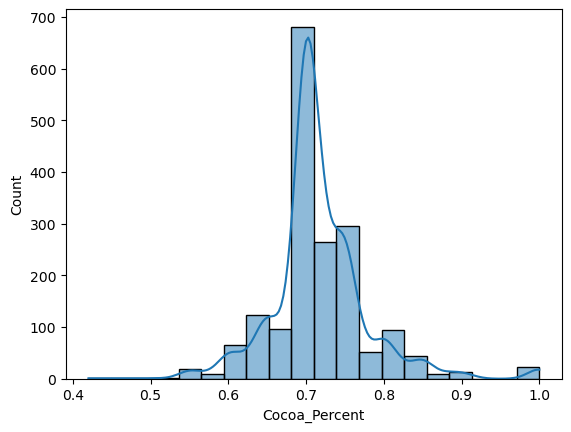

In [19]:
sns.histplot(df['Cocoa_Percent'], bins=20, kde = True) 

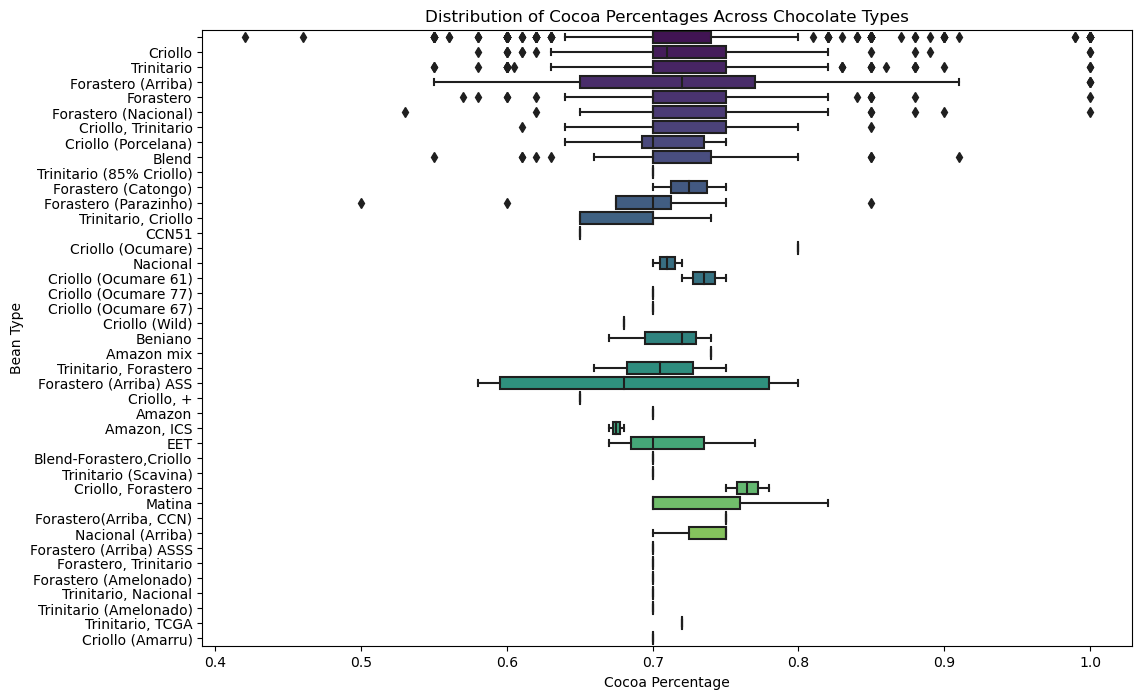

In [20]:
# Creating a boxplot to show the distribution of cocoa percentages for each chocolate type
plt.figure(figsize=(12, 8))
box_coca=sns.boxplot(x='Cocoa_Percent', y='Bean_Type', data=df, palette='viridis')


# Setting plot labels and title
plt.title('Distribution of Cocoa Percentages Across Chocolate Types')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Bean Type')

# visualizing the plot
plt.show()

Here you have the box plot to see what most bean types ans their cocoa percentage. we can see most of the bean type had 70% higer cocoa. 

In [21]:
box_coca.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'box.png'))

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bean_Type', ylabel='Count'>

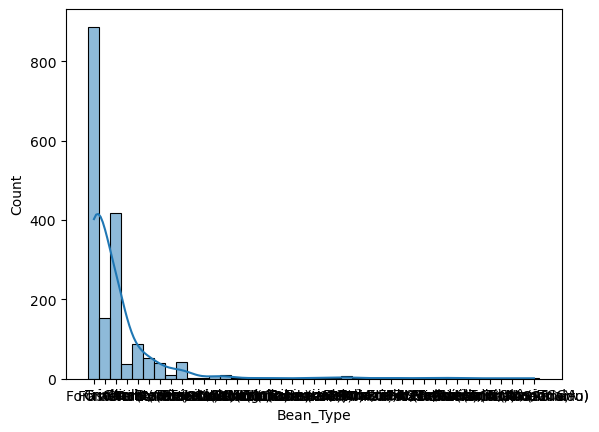

In [22]:
sns.histplot(df['Bean_Type'], bins=20, kde = True) 

In [23]:
# Get the top 20 most frequent bean types
top_20_bean_types = df['Bean_Type'].value_counts().head(20).index

In [24]:
df_top_20_types = df[df['Bean_Type'].isin(top_20_bean_types)]

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


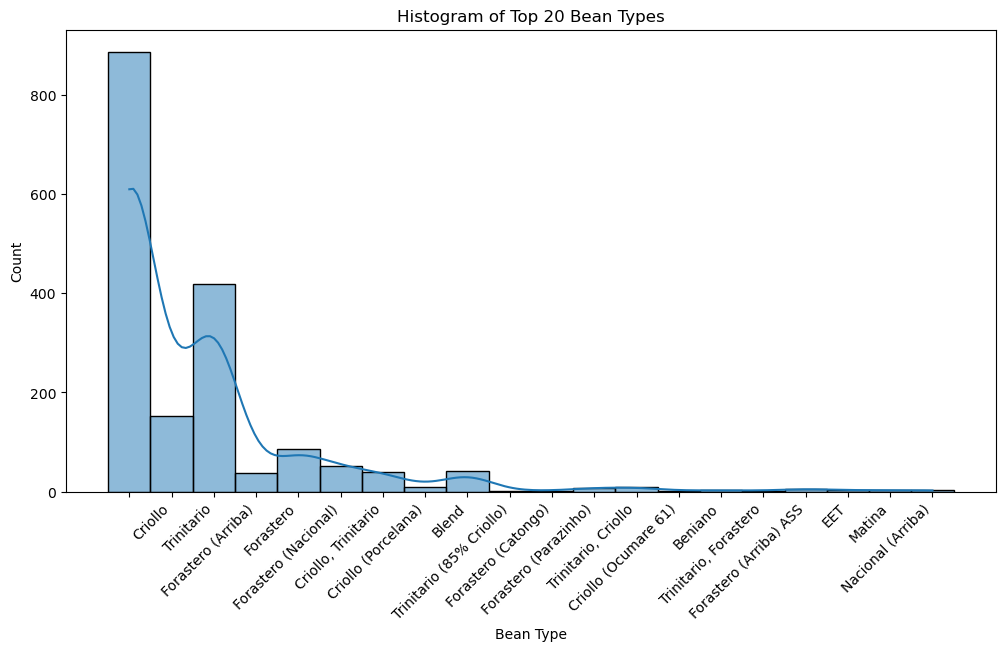

In [25]:
# Create a histogram plot
plt.figure(figsize=(12, 6))
sns.histplot(df_top_20_types['Bean_Type'], bins=20, kde=True)
plt.title('Histogram of Top 20 Bean Types')
plt.xlabel('Bean Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\banda\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\banda\AppData\Local\Temp\ipykernel_32184\159165109.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  cat1.set_xticklabels(cat1.get_xticklabels(), rotation=90)


<Figure size 10000x600 with 0 Axes>

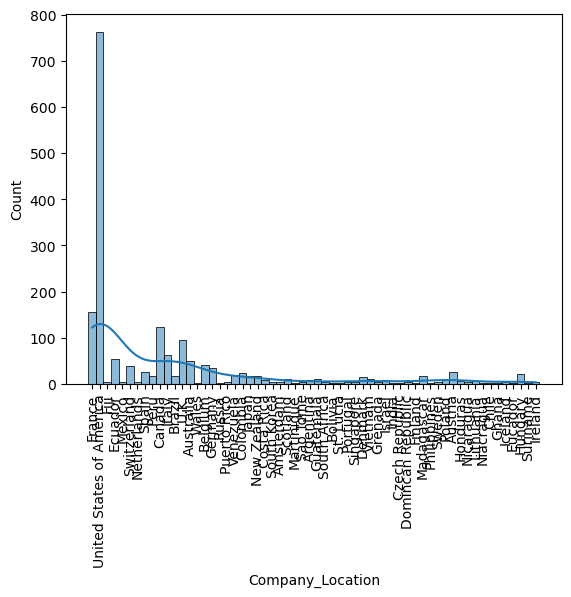

<Figure size 10000x600 with 0 Axes>

In [26]:
cat1=sns.histplot(df['Company_Location'], bins = 1000, kde = True)
cat1.set_xticklabels(cat1.get_xticklabels(), rotation=90)
plt.figure(figsize=(100, 6))

In [27]:
df.dtypes

Company_Name         object
Bean_Origin_Name     object
Reference_number      int64
Review_Date          object
Cocoa_Percent       float64
Company_Location     object
Rating              float64
Bean_Type            object
Bean_Origin          object
Rating Flag          object
dtype: object

Statistic for all variables.

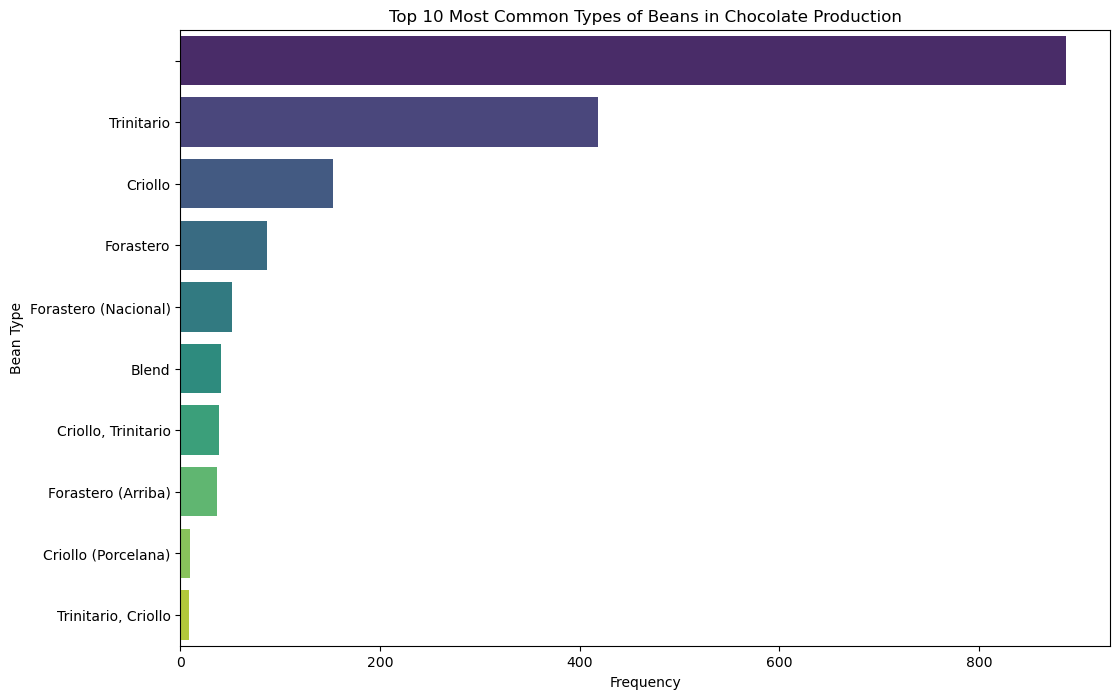

In [28]:

common_beans = df['Bean_Type'].value_counts().head(10)

# Plot the most common bean types
plt.figure(figsize=(12, 8))
bar_common_beans = sns.barplot(x=common_beans.values, y=common_beans.index, palette='viridis')

# Customize plot labels and title
plt.title('Top 10 Most Common Types of Beans in Chocolate Production')
plt.xlabel('Frequency')
plt.ylabel('Bean Type')

# Show the plot
plt.show()

In [29]:
bar_common_beans.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'top10beantype.png'))

In [30]:
df.describe(include='all')

,Company_Name,Bean_Origin_Name,Reference_number,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Rating Flag
count,1793,1793,1793.000000,1793,1793.000000,1793,1793.000000,1793,1793,1793
unique,416,1038,NaN,1,NaN,60,NaN,41,99,3
top,Soma,Madagascar,NaN,00:00.0,NaN,United States of America,NaN,,Venezuela,Mid rating
freq,46,56,NaN,1793,NaN,763,NaN,887,214,1075
mean,NaN,NaN,1036.126046,NaN,0.716991,NaN,3.185862,NaN,NaN,NaN
std,NaN,NaN,553.128742,NaN,0.063265,NaN,0.477668,NaN,NaN,NaN
min,NaN,NaN,5.000000,NaN,0.420000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,576.000000,NaN,0.700000,NaN,3.000000,NaN,NaN,NaN
50%,NaN,NaN,1073.000000,NaN,0.700000,NaN,3.250000,NaN,NaN,NaN
75%,NaN,NaN,1502.000000,NaN,0.750000,NaN,3.500000,NaN,NaN,NaN


In [31]:
df = df.replace(u'\xa0', np.NaN)

In [32]:
df.isnull().sum()

Company_Name          0
Bean_Origin_Name      0
Reference_number      0
Review_Date           0
Cocoa_Percent         0
Company_Location      0
Rating                0
Bean_Type           887
Bean_Origin          73
Rating Flag           0
dtype: int64

percentage of missing values

In [33]:
percentage_missing = df.isnull().sum().sort_values(ascending=False) * 100/len(df)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing

Bean_Type      49.470162
Bean_Origin     4.071389
dtype: float64

removing the bean type. 

In [34]:
# datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

What are the most common types of beans used in chocolate production? Top 10

How does the type of bean influence the chocolate's rating?

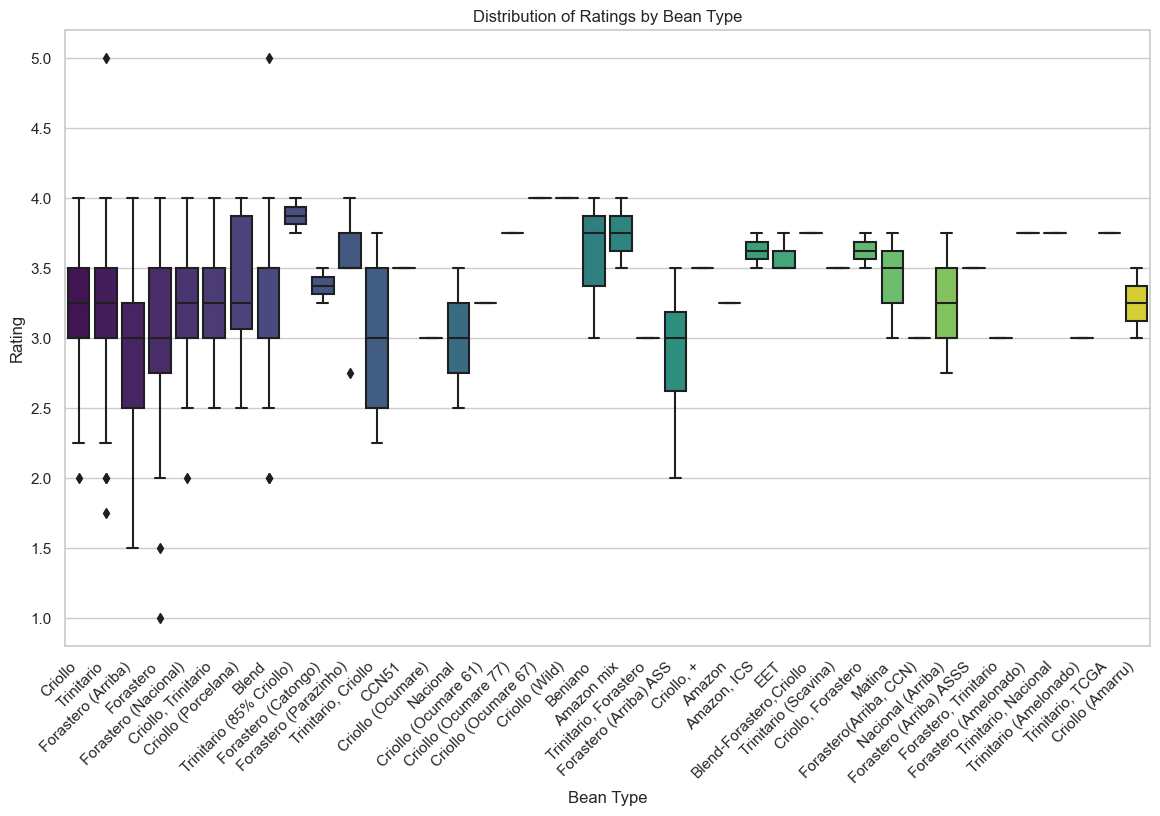

In [35]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a boxplot to visualize the distribution of ratings for each bean type
boxplot = sns.boxplot(x='Bean_Type', y='Rating', data=df, palette='viridis')

# Customize plot labels and title
plt.title('Distribution of Ratings by Bean Type')
plt.xlabel('Bean Type')
plt.ylabel('Rating')

# Rotate x-axis labels for better visibility
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()

In [36]:
boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxratingbeantype.png'))

In [37]:
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'chocoalate_clean2.csv'))